In [1]:
# This code block puts 2D Array (4144, 9217) inside output.txt, last column represents the labels (1=Damaged, 0=Intact)
 
import pickle
import numpy as np

# Load the pickled object from a file
with open('data.pickle', 'rb') as file:
    data = pickle.load(file)


#np.set_printoptions(threshold=np.inf) #default threshold=1000

with open('output.txt', 'w') as text_file:
    text_file.write(str(data))

print("Pickled object converted to text file successfully.")


Pickled object converted to text file successfully.


In [2]:
with open('data.pickle', 'rb') as file:
    data = pickle.load(file)
    print(data)

    print(data.shape)


[[ 97.  91.  94. ... 169. 165.   1.]
 [ 91.  93.  91. ...  90.  91.   1.]
 [ 90.  90.  89. ...  94.  93.   1.]
 ...
 [ 85.  85.  85. ...  84.  86.   1.]
 [ 86.  84.   1. ...  94.   0.   1.]
 [ 94.  91.  87. ...   0.  96.   1.]]
(4144, 9217)


In [3]:
import numpy as np

#Get the labels column
labels = data[:, -1]

#Sort the damaged data and remove its labels.
damaged_data = data[labels == 1]
damaged_data = damaged_data[:, :-1]

#Sort the intact data and remove its labels.
intact_data = data[labels == 0]
intact_data = intact_data[:, :-1]

print(damaged_data.shape)
print(intact_data.shape)

(3495, 9216)
(649, 9216)


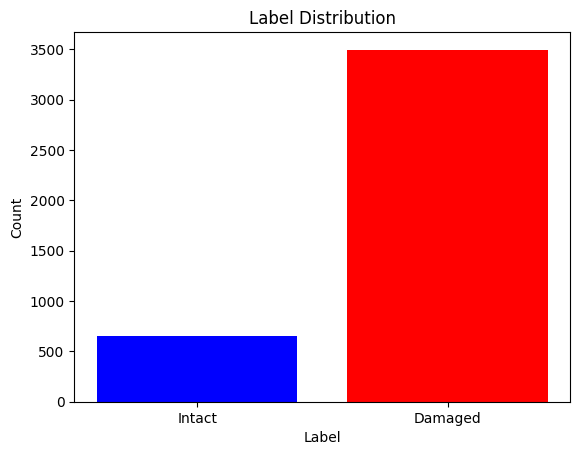

Label Counts:
Intact: 649
Damaged: 3495


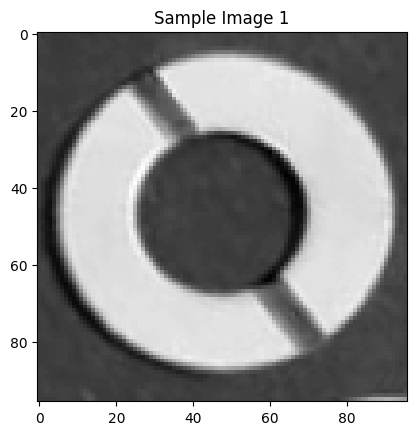

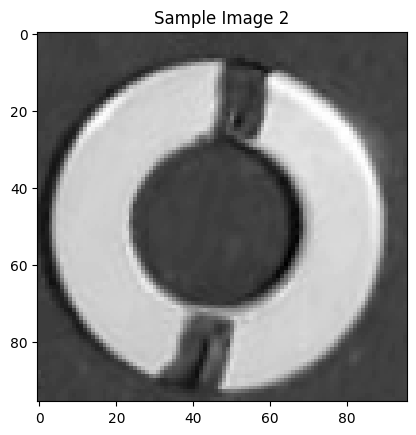

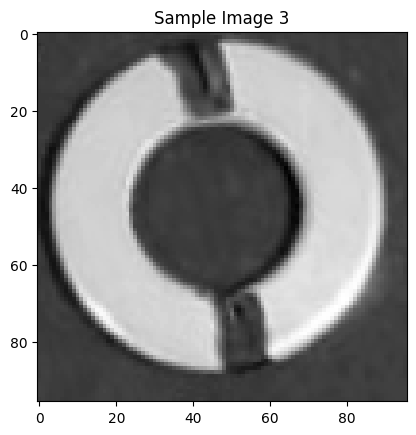

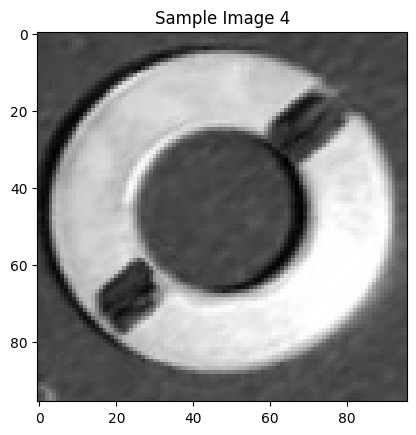

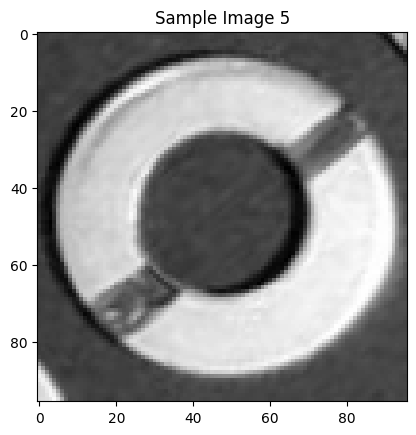

Summary Statistics for Pixel Values:
Mean: 123.4456423935794
Standard Deviation: 63.64057760220465
Min Value: 0.0
Max Value: 255.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Count the occurrences of each label
label_counts = np.bincount(labels.astype(int))

# Plot a bar chart to visualize label distribution
plt.bar(['Intact', 'Damaged'], label_counts, color=['blue', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

print("Label Counts:")
print("Intact:", label_counts[0])
print("Damaged:", label_counts[1])

# Reshape and display sample images
sample_images = data[:, :-1]  # Exclude the last column (labels)
num_samples = 5  # Number of sample images to display


for i in range(num_samples):
    sample_image = sample_images[i].reshape(96, 96)  # Reshape to 96x96
    
    plt.imshow(sample_image, cmap='gray')
    plt.title(f'Sample Image {i+1}')
    plt.show()


    # Compute summary statistics for pixel values
pixel_values = sample_images.flatten()  # Flatten to 1D array
mean_value = np.mean(pixel_values)
std_deviation = np.std(pixel_values)
min_value = np.min(pixel_values)
max_value = np.max(pixel_values)

print("Summary Statistics for Pixel Values:")
print("Mean:", mean_value)
print("Standard Deviation:", std_deviation)
print("Min Value:", min_value)
print("Max Value:", max_value)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = data[:, :-1]  # Features (pixel values)
y = data[:, -1]   # Labels
print(X.shape)
print(y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_clf = SVC(kernel='linear', random_state=42, C=0.001)


# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


(4144, 9216)
(4144,)
SVM Accuracy: 0.9963811821471653
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       123
         1.0       1.00      1.00      1.00       706

    accuracy                           1.00       829
   macro avg       1.00      0.99      0.99       829
weighted avg       1.00      1.00      1.00       829



In [5]:
X = data[:, :-1]  # Features (pixel values)
y = data[:, -1]   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_clf = SVC(kernel='linear', random_state=42, C=0.001)


# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9963811821471653
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       123
         1.0       1.00      1.00      1.00       706

    accuracy                           1.00       829
   macro avg       1.00      0.99      0.99       829
weighted avg       1.00      1.00      1.00       829



In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dtc_clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
dtc_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtc = dtc_clf.predict(X_test)

# Evaluate the Decision Tree Classifier
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Classifier Accuracy:", accuracy_dtc)
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc))

NameError: name 'X_train' is not defined

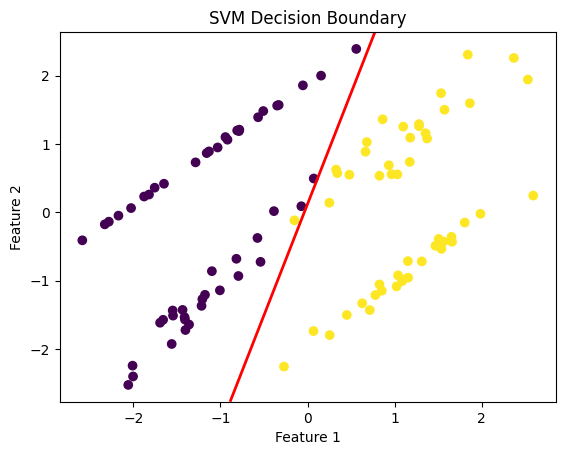

In [6]:
#This code block visualize the splitting the data into half.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Yapay veri seti oluşturma
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# SVM sınıflandırıcı oluşturma
svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

# Karar düzlemini çizdirme
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Meshgrid oluşturma
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Karar sınırlayıcıyı çizdirme
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()


In [7]:
import numpy as np

# Filter damaged (1) labeled arrays
damaged_data = data[labels == 1]
damaged_data = damaged_data[:, :-1]
print(damaged_data.shape)


(3495, 9216)


In [20]:
#This code block visualize the desired element of our data
i = 0
sample_image = sample_images[i].reshape(96, 96)  # Reshape to 96x96
plt.imshow(sample_image, cmap='gray')
plt.title(f'Sample Image {i+1}')
plt.show()

i = 1
sample_image = sample_images[i].reshape(96, 96)  # Reshape to 96x96
plt.imshow(sample_image, cmap='gray')
plt.title(f'Sample Image {i+1}')
plt.show()

i = 2
sample_image = sample_images[i].reshape(96, 96)  # Reshape to 96x96
plt.imshow(sample_image, cmap='gray')
plt.title(f'Sample Image {i+1}')
plt.show()

i = 485
sample_image = sample_images[i].reshape(96, 96)  # Reshape to 96x96
plt.imshow(sample_image, cmap='gray')
plt.title(f'Sample Image {i+1}')
plt.show()

    # Compute summary statistics for pixel values
pixel_values = sample_images.flatten()  # Flatten to 1D array
mean_value = np.mean(pixel_values)
std_deviation = np.std(pixel_values)
min_value = np.min(pixel_values)
max_value = np.max(pixel_values)

print("Summary Statistics for Pixel Values:")
print("Mean:", mean_value)
print("Standard Deviation:", std_deviation)
print("Min Value:", min_value)
print("Max Value:", max_value)

NameError: name 'sample_images' is not defined

IndexError: index 2 is out of bounds for axis 0 with size 2

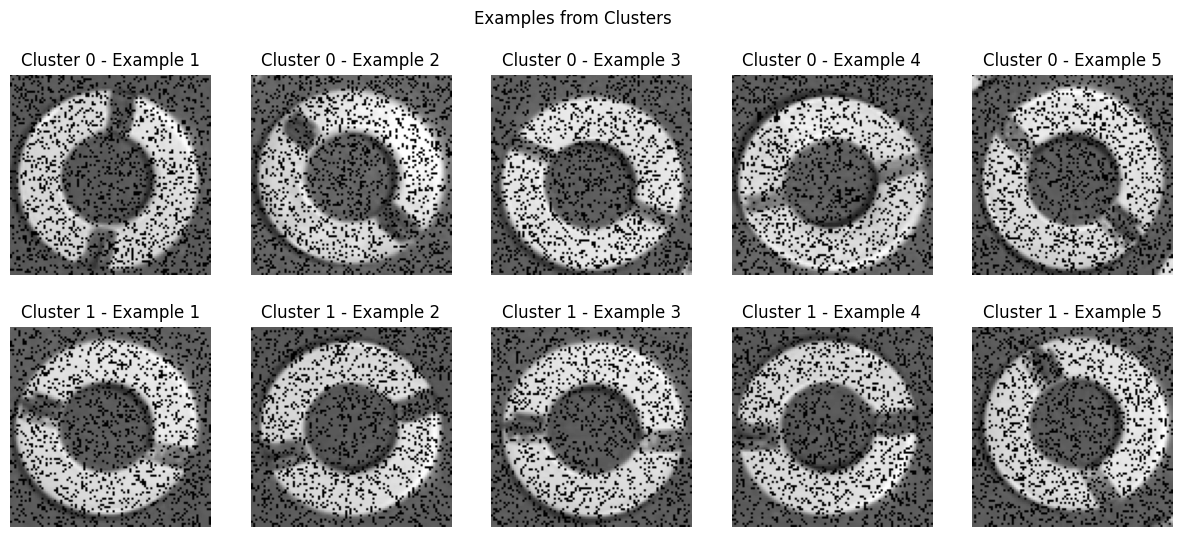

In [8]:
#Unsupervised learning for 2 labels (damaged and intact)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(damaged_data)

# Display 5 examples from each cluster
cluster_examples = {0: [], 1: [], 2:[], 3:[]}
for i, label in enumerate(cluster_labels):
    if len(cluster_examples[label]) < 5:
        cluster_examples[label].append(damaged_data[i])

# Plotting the examples
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Examples from Clusters')
for cluster_label, examples in cluster_examples.items():
    for i, example in enumerate(examples):
        ax = axs[cluster_label, i]
        ax.imshow(np.reshape(example, (96, 96)), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Cluster {cluster_label} - Example {i+1}')
plt.tight_layout()
plt.show()


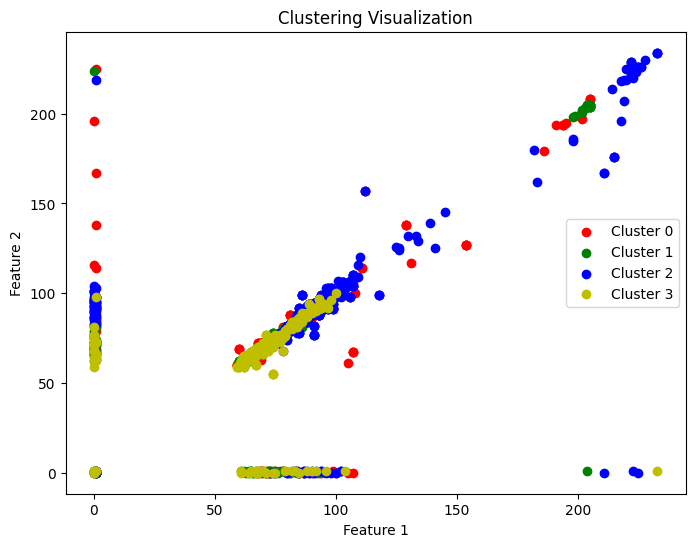

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'damaged_data' contains your 2D array of images (3495, 9216)
# Assuming 'cluster_labels' contains the cluster labels assigned by K-means clustering

# Perform K-means clustering (if not already done)
num_clusters = 4  # Number of clusters (corresponding to different types of damage)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(damaged_data)

# Visualize the clustering results using a scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']  # Colors for each cluster
for cluster_num, color in zip(range(num_clusters), colors):
    cluster_points = damaged_data[cluster_labels == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster_num}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Visualization')
plt.legend()
plt.show()


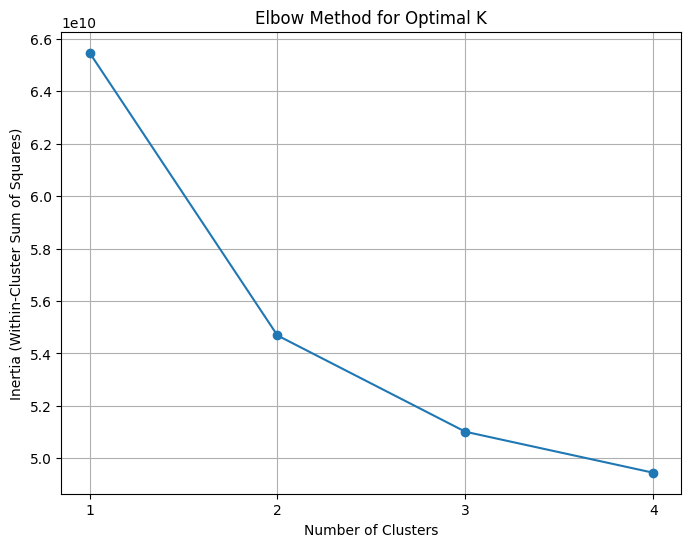

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Define range of clusters to test
max_clusters = 4  # Maximum number of clusters to test
inertia_values = []  # Store inertia values for each number of clusters

# Calculate inertia for each number of clusters
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(damaged_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()


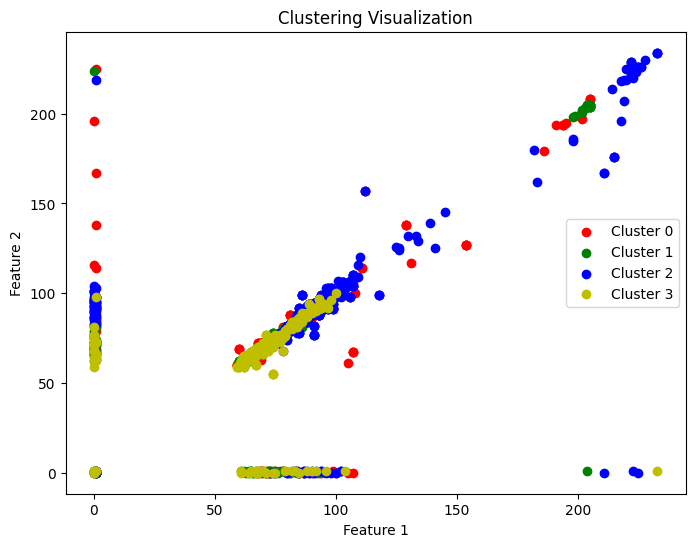

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Perform K-means clustering (if not already done)
num_clusters = 4  # Number of clusters (corresponding to different types of damage)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(damaged_data)

# Visualize the clustering results using a scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']  # Colors for each cluster
for cluster_num, color in zip(range(num_clusters), colors):
    cluster_points = damaged_data[cluster_labels == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster_num}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Visualization')
plt.legend()
plt.show()


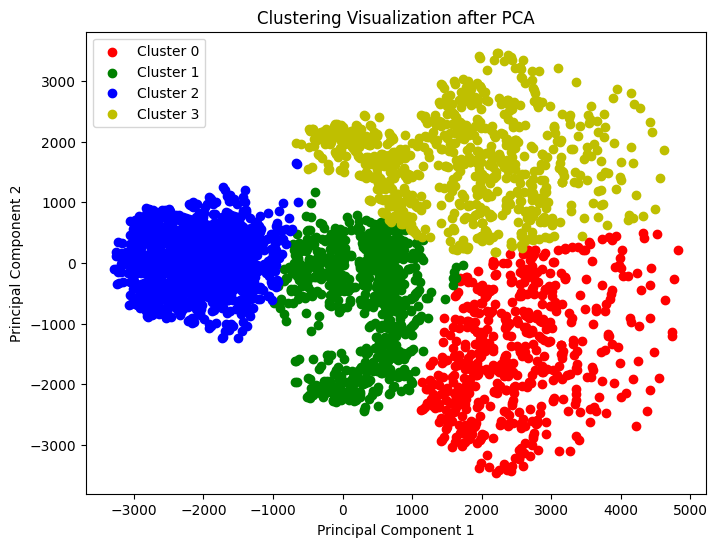

In [12]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Perform PCA for dimensionality reduction
num_components = 2  # Number of components to keep (you can adjust this)
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(damaged_data)

# Perform K-means clustering on reduced data
num_clusters = 4  # Number of clusters (corresponding to different types of damage)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

# Visualize the clustering results using a scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y']  # Colors for each cluster
for cluster_num, color in zip(range(num_clusters), colors):
    cluster_points = reduced_data[cluster_labels == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster_num}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization after PCA')
plt.legend()
plt.show()


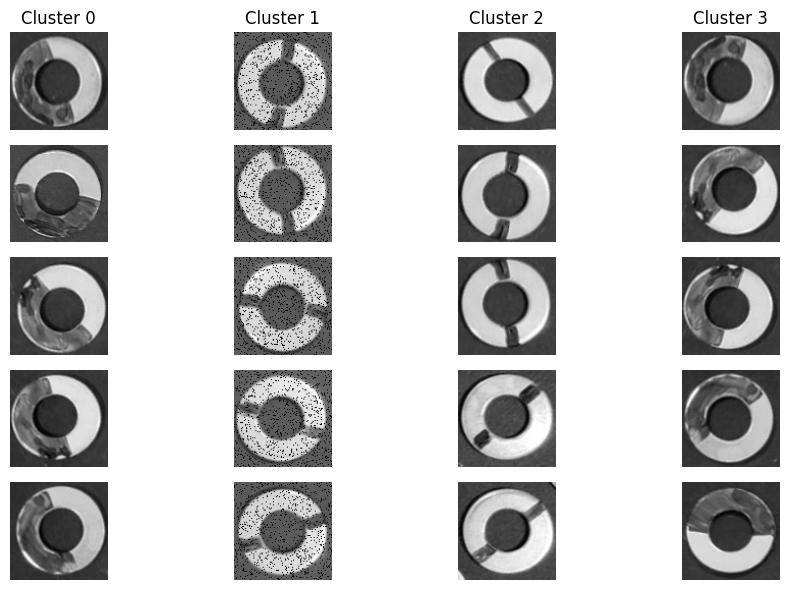

In [25]:
# Define a function to plot example images from each cluster
def plot_cluster_examples(cluster_labels, num_clusters, num_examples=5):
    plt.figure(figsize=(10, 6))
    for cluster_num in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster_num)[0][:num_examples]
        for i, index in enumerate(cluster_indices):
            image = damaged_data[index].reshape(96, 96)  # Assuming images are 96x96 pixels
            plt.subplot(num_examples, num_clusters, i * num_clusters + cluster_num + 1)
            plt.imshow(image, cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(f'Cluster {cluster_num}')
    plt.tight_layout()
    plt.show()

# Plot example images from each cluster
num_clusters = 4  # Number of clusters (corresponding to different types of damage)
plot_cluster_examples(cluster_labels, num_clusters)
